In [25]:
from sklearn.datasets import fetch_california_housing
import torch
import pandas as pd
import numpy as np
from torch import optim

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv"

In [7]:
df = pd.read_csv(url)

In [8]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [9]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [10]:
df = df.dropna()

In [11]:
df["Cabin"] = df["Cabin"].str.split("/").str[0]

In [12]:
df = df.drop(columns = ["PassengerId" , "Name"])

In [13]:
df = pd.get_dummies(df, columns=['HomePlanet', "Cabin", "Destination"], drop_first=True)

In [14]:
df.head(3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,True,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,True


In [15]:
df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [17]:
df.describe().round(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.00,6606.00,6606.00,6606.00,6606.00,6606.00
mean,28.89,222.99,478.96,178.36,313.16,303.78
std,14.53,644.99,1678.59,576.33,1144.02,1127.14
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,49.00,82.75,30.00,65.00,52.00
max,79.00,9920.00,29813.00,12253.00,22408.00,20336.00


In [18]:
df.nunique()

CryoSleep                       2
Age                            80
VIP                             2
RoomService                  1093
FoodCourt                    1293
ShoppingMall                  984
Spa                          1143
VRDeck                       1106
Transported                     2
HomePlanet_Europa               2
HomePlanet_Mars                 2
Cabin_B                         2
Cabin_C                         2
Cabin_D                         2
Cabin_E                         2
Cabin_F                         2
Cabin_G                         2
Cabin_T                         2
Destination_PSO J318.5-22       2
Destination_TRAPPIST-1e         2
dtype: int64

In [19]:
features = df.drop(columns = "Transported")

In [20]:
target = df["Transported"]

# Split the Data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state = 42)

# Standarize Data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

log_reg.score(X_test_scaled, y_test)

0.791981845688351

## Model Evaluation: Confussion Matrix

In [42]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

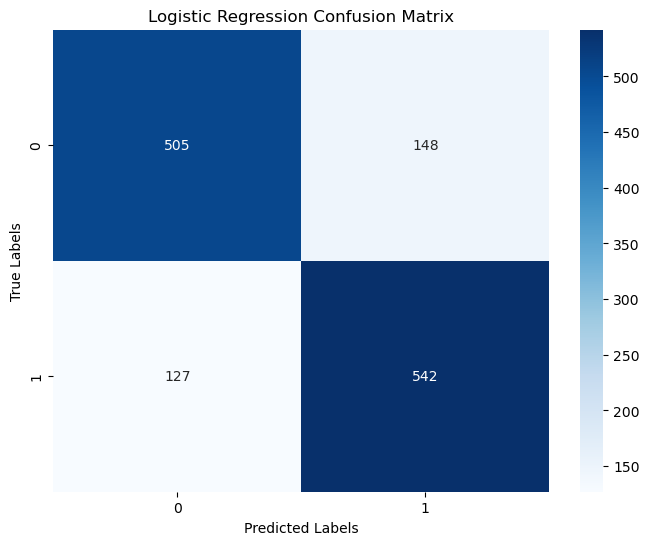

In [43]:
# Matriz de confusión para Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [46]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.791981845688351
Recall: 0.8101644245142003
Precision: 0.7855072463768116


# Neuronal Network Model

In [26]:
y_train = np.array(y_train)

y_test = np.array(y_test)

In [27]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [28]:
from torch import nn

In [33]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size,hidden_size),
                                    nn.Linear(hidden_size,output_size),
                                    nn.Sigmoid())
    def forward(self, x):
        return self.network(x)

In [34]:
len(features.columns)

19

In [35]:
features.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [36]:
input_size = 19
hidden_size = 10
output_size = 1

model = SimpleNN(input_size, hidden_size, output_size)

In [55]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # criterion = BCELoss()   , for Classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5000
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.4320
Epoch [20/5000], Loss: 0.4320
Epoch [30/5000], Loss: 0.4320
Epoch [40/5000], Loss: 0.4320
Epoch [50/5000], Loss: 0.4320
Epoch [60/5000], Loss: 0.4320
Epoch [70/5000], Loss: 0.4320
Epoch [80/5000], Loss: 0.4320
Epoch [90/5000], Loss: 0.4320
Epoch [100/5000], Loss: 0.4320
Epoch [110/5000], Loss: 0.4320
Epoch [120/5000], Loss: 0.4320
Epoch [130/5000], Loss: 0.4320
Epoch [140/5000], Loss: 0.4320
Epoch [150/5000], Loss: 0.4320
Epoch [160/5000], Loss: 0.4320
Epoch [170/5000], Loss: 0.4320
Epoch [180/5000], Loss: 0.4320
Epoch [190/5000], Loss: 0.4320
Epoch [200/5000], Loss: 0.4320
Epoch [210/5000], Loss: 0.4320
Epoch [220/5000], Loss: 0.4320
Epoch [230/5000], Loss: 0.4320
Epoch [240/5000], Loss: 0.4320
Epoch [250/5000], Loss: 0.4320
Epoch [260/5000], Loss: 0.4320
Epoch [270/5000], Loss: 0.4320
Epoch [280/5000], Loss: 0.4320
Epoch [290/5000], Loss: 0.4320
Epoch [300/5000], Loss: 0.4320
Epoch [310/5000], Loss: 0.4320
Epoch [320/5000], Loss: 0.4320
Epoch [330/5000],

Epoch [2610/5000], Loss: 0.4320
Epoch [2620/5000], Loss: 0.4320
Epoch [2630/5000], Loss: 0.4320
Epoch [2640/5000], Loss: 0.4320
Epoch [2650/5000], Loss: 0.4320
Epoch [2660/5000], Loss: 0.4320
Epoch [2670/5000], Loss: 0.4320
Epoch [2680/5000], Loss: 0.4320
Epoch [2690/5000], Loss: 0.4320
Epoch [2700/5000], Loss: 0.4320
Epoch [2710/5000], Loss: 0.4320
Epoch [2720/5000], Loss: 0.4320
Epoch [2730/5000], Loss: 0.4320
Epoch [2740/5000], Loss: 0.4320
Epoch [2750/5000], Loss: 0.4320
Epoch [2760/5000], Loss: 0.4320
Epoch [2770/5000], Loss: 0.4320
Epoch [2780/5000], Loss: 0.4320
Epoch [2790/5000], Loss: 0.4320
Epoch [2800/5000], Loss: 0.4320
Epoch [2810/5000], Loss: 0.4320
Epoch [2820/5000], Loss: 0.4320
Epoch [2830/5000], Loss: 0.4320
Epoch [2840/5000], Loss: 0.4320
Epoch [2850/5000], Loss: 0.4320
Epoch [2860/5000], Loss: 0.4320
Epoch [2870/5000], Loss: 0.4320
Epoch [2880/5000], Loss: 0.4320
Epoch [2890/5000], Loss: 0.4320
Epoch [2900/5000], Loss: 0.4320
Epoch [2910/5000], Loss: 0.4320
Epoch [2

## Model Evaluation: compute accuracy

In [56]:
model.eval()
with torch.no_grad():
    outputs = model(torch.FloatTensor(X_test_scaled)).squeeze()
    predicted = (outputs >= 0.5).float()

y_pred_nn = predicted.numpy()

print("Neural Network:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))


Neural Network:
Accuracy: 0.7912254160363086
Recall: 0.8116591928251121
Precision: 0.7835497835497836


## Model Evaluation: Confussion Matrix

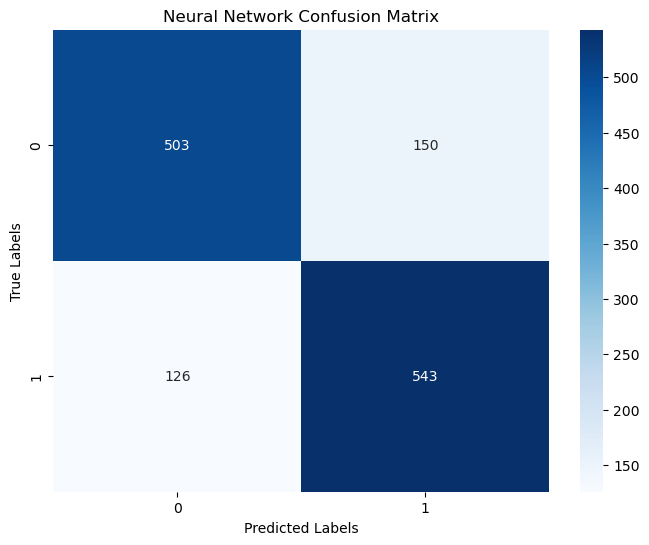

In [57]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()